In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Display basic information about our data
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nSpecies distribution:")
print(df['species'].value_counts())

Dataset shape: (150, 5)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Species distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


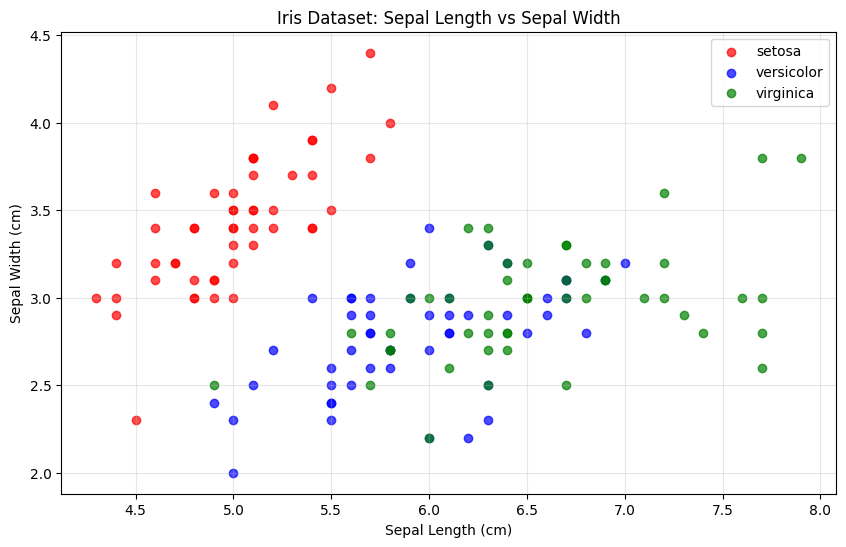

In [3]:
# Create a scatter plot to visualize the data
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
species = df['species'].unique()

for i, species_name in enumerate(species):
    species_data = df[df['species'] == species_name]
    plt.scatter(species_data['sepal length (cm)'], 
               species_data['sepal width (cm)'], 
               c=colors[i], 
               label=species_name,
               alpha=0.7)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset: Sepal Length vs Sepal Width')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [4]:
# Prepare features (X) and target (y)
X = df.drop('species', axis=1)  # Features: all measurements
y = df['species']  # Target: species names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"Features: {list(X.columns)}")

Training set size: 120
Testing set size: 30
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# Create and train the KNN classifier
k = 5  # We will use 5 neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

print(f"KNN classifier trained with k={k} neighbors")

KNN classifier trained with k=5 neighbors


In [6]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2%}")

# Show some individual predictions
print("\nSample predictions:")
for i in range(5):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    features = X_test.iloc[i].values
    print(f"Actual: {actual:12} | Predicted: {predicted:12} | Features: {features}")

Model accuracy: 100.00%

Sample predictions:
Actual: setosa       | Predicted: setosa       | Features: [4.4 3.  1.3 0.2]
Actual: virginica    | Predicted: virginica    | Features: [6.1 3.  4.9 1.8]
Actual: versicolor   | Predicted: versicolor   | Features: [4.9 2.4 3.3 1. ]
Actual: versicolor   | Predicted: versicolor   | Features: [5.  2.3 3.3 1. ]
Actual: setosa       | Predicted: setosa       | Features: [4.4 3.2 1.3 0.2]


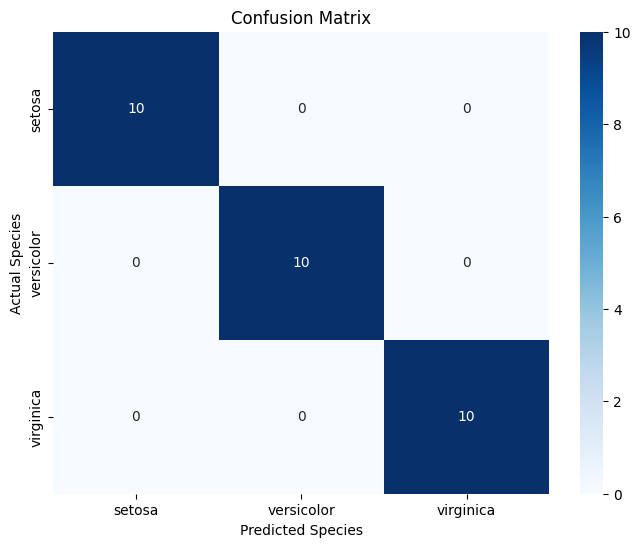

In [7]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Species')
plt.xlabel('Predicted Species')
plt.show()

In [8]:
# Demonstrate KNN prediction for one example
test_idx = 0
test_point = X_test.iloc[[test_idx]]  # Keep as DataFrame to preserve feature names
test_species = y_test.iloc[test_idx]

# Find the k nearest neighbors
distances, neighbor_indices = knn.kneighbors(test_point)
neighbor_species = y_train.iloc[neighbor_indices[0]]

print(f"\nPredicting species for test point:")
print(f"Actual species: {test_species}")
print(f"Predicted species: {knn.predict(test_point)[0]}")
print(f"\nThe {k} nearest neighbors are:")
for i, (dist, species) in enumerate(zip(distances[0], neighbor_species)):
    print(f"  Neighbor {i+1}: {species} (distance: {dist:.3f})")


Predicting species for test point:
Actual species: setosa
Predicted species: setosa

The 5 nearest neighbors are:
  Neighbor 1: setosa (distance: 0.141)
  Neighbor 2: setosa (distance: 0.245)
  Neighbor 3: setosa (distance: 0.300)
  Neighbor 4: setosa (distance: 0.300)
  Neighbor 5: setosa (distance: 0.361)


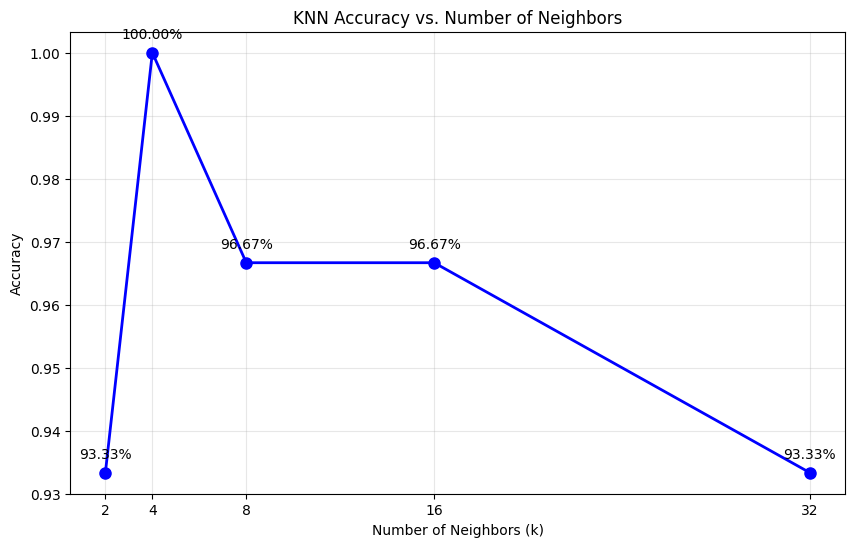

In [9]:
# Test different values of k
k_values = [2, 4, 8, 16, 32]
accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    pred_temp = knn_temp.predict(X_test)
    acc_temp = accuracy_score(y_test, pred_temp)
    accuracies.append(acc_temp)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

for i, acc in enumerate(accuracies):
    plt.annotate(f'{acc:.2%}', (k_values[i], acc), 
                textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

In [10]:
# Predict species for a new flower
new_flower_data = [[5.1, 3.5, 1.4, 0.2]]  # Sepal length, sepal width, petal length, petal width
new_flower = pd.DataFrame(new_flower_data, columns=X.columns)  # Create DataFrame with proper feature names

predicted_species = knn.predict(new_flower)
prediction_probability = knn.predict_proba(new_flower)

print(f"\nNew flower measurements: {new_flower_data[0]}")
print(f"Predicted species: {predicted_species[0]}")
print(f"Prediction probabilities:")
for species, prob in zip(iris.target_names, prediction_probability[0]):
    print(f"  {species}: {prob:.2%}")


New flower measurements: [5.1, 3.5, 1.4, 0.2]
Predicted species: setosa
Prediction probabilities:
  setosa: 100.00%
  versicolor: 0.00%
  virginica: 0.00%
